## Machine Learning: bikeshare data for Capstone 1

Let's start by adding the rest of 2016 data.

As a reminder, the data can be found here, https://s3.amazonaws.com/capitalbikeshare-data/index.html.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

Q1 = pd.read_csv('../CapstoneDrafts/data/2016Q1-capitalbikeshare-tripdata.csv', 
                        parse_dates=True, index_col=1, header=0,
                        names=['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype'])
Q2 = pd.read_csv('../CapstoneDrafts/data/2016Q2-capitalbikeshare-tripdata.csv', 
                        parse_dates=True, index_col=1, header=0,
                        names=['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype'])
Q3 = pd.read_csv('../CapstoneDrafts/data/2016Q3-capitalbikeshare-tripdata.csv', 
                        parse_dates=True, index_col=1, header=0,
                        names=['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype'])
Q4 = pd.read_csv('../CapstoneDrafts/data/2016Q4-capitalbikeshare-tripdata.csv', 
                        parse_dates=True, index_col=1, header=0,
                        names=['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype'])

In [4]:
bike2016 = Q1.append([Q2,Q3,Q4])
bike2016.duration = bike2016.duration
print('Number of rows in the dataset for 2016:',len(bike2016))
bike2016.head()

Number of rows in the dataset for 2016: 3333994


duration              enddate  startlocID  \
2016-01-01 00:06:58       166  2016-01-01 00:09:44       31102   
2016-01-01 00:10:20       448  2016-01-01 00:17:48       32039   
2016-01-01 00:13:52       715  2016-01-01 00:25:48       31222   
2016-01-01 00:15:29       213  2016-01-01 00:19:03       31506   
2016-01-01 00:16:16       872  2016-01-01 00:30:49       31041   

                                             startloc  endlocID  \
2016-01-01 00:06:58               11th & Kenyon St NW     31105   
2016-01-01 00:10:20  Old Georgetown Rd & Southwick St     32002   
2016-01-01 00:13:52         New York Ave & 15th St NW     31214   
2016-01-01 00:15:29         1st & Rhode Island Ave NW     31509   
2016-01-01 00:16:16              Prince St & Union St     31048   

                                          endloc  bikeID memtype  
2016-01-01 00:06:58         14th & Harvard St NW  W01346  Member  
2016-01-01 00:10:20  Bethesda Ave & Arlington Rd  W22202  Member  
2016-01-01 00:13:52        17th & Corcoran St NW  W21427  Member  
2016-01-01 00:15:29     New Jersey Ave & R St NW  W01294  Member  
2016-01-01 00:16:16          King St Metro South  W22058  Member

#### Read 2015 data

In [6]:
#2015
Q1_2015 = pd.read_csv('../CapstoneDrafts/data/2015Q1-capitalbikeshare-tripdata.csv', 
                        parse_dates=True, index_col=1, header=0,
                        names=['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype'])
Q2_2015 = pd.read_csv('../CapstoneDrafts/data/2015Q2-capitalbikeshare-tripdata.csv', 
                        parse_dates=True, index_col=1, header=0,
                        names=['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype'])
Q3_2015 = pd.read_csv('../CapstoneDrafts/data/2015Q3-capitalbikeshare-tripdata.csv', 
                        parse_dates=True, index_col=1, header=0,
                        names=['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype'])
Q4_2015 = pd.read_csv('../CapstoneDrafts/data/2015Q4-capitalbikeshare-tripdata.csv', 
                        parse_dates=True, index_col=1, header=0,
                        names=['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype'])

In [7]:
#merge 2015
bike2015 = Q1_2015.append([Q2_2015,Q3_2015,Q4_2015])
bike2015.duration = bike2015.duration
print('Number of rows in the dataset for 2015:',len(bike2015))
bike2015.head()

Number of rows in the dataset for 2015: 3185906


duration              enddate  startlocID  \
2015-01-01 00:02:44      2389  2015-01-01 00:42:33       31271   
2015-01-01 00:02:46      2394  2015-01-01 00:42:41       31271   
2015-01-01 00:04:32       468  2015-01-01 00:12:20       31204   
2015-01-01 00:07:18       348  2015-01-01 00:13:06       31602   
2015-01-01 00:09:39       980  2015-01-01 00:26:00       31247   

                                             startloc  endlocID  \
2015-01-01 00:02:44  Constitution Ave & 2nd St NW/DOL     31254   
2015-01-01 00:02:46  Constitution Ave & 2nd St NW/DOL     31254   
2015-01-01 00:04:32                    20th & E St NW     31234   
2015-01-01 00:07:18           Park Rd & Holmead Pl NW     31117   
2015-01-01 00:09:39         Jefferson Dr & 14th St SW     31241   

                                            endloc  bikeID memtype  
2015-01-01 00:02:44                 15th & K St NW  W01140  Casual  
2015-01-01 00:02:46                 15th & K St NW  W00612  Casual  
2015-01-01 00:04:32  20th & O St NW / Dupont South  W01226  Member  
2015-01-01 00:07:18           15th & Euclid St  NW  W20216  Member  
2015-01-01 00:09:39                  Thomas Circle  W21005  Casual

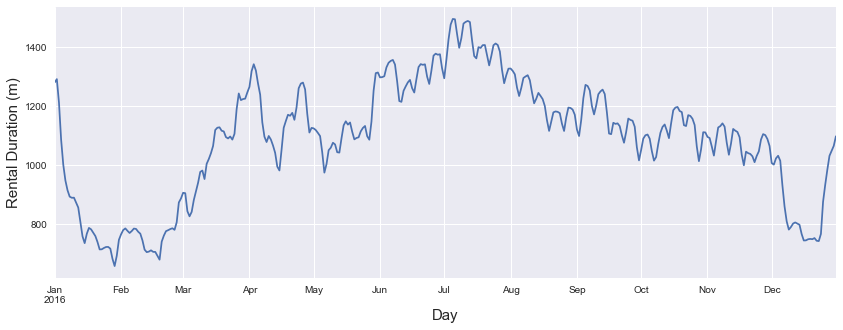

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14,5)
duration = bike2016['duration']
smoothed = duration.resample('D').mean().rolling(window=12, min_periods=1).mean()
smoothed.plot(ax=ax)
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Rental Duration (m)',fontsize=15)

Are there different durations for registered versus casual members?

In [9]:
durationReg = bike2016['duration'][bike2016['memtype']=='Member']
durationCas = bike2016['duration'][bike2016['memtype']=='Casual']

smoothedReg = durationReg.resample('D').mean().rolling(window=12, min_periods=1).mean()
smoothedCas = durationCas.resample('D').mean().rolling(window=12, min_periods=1).mean()

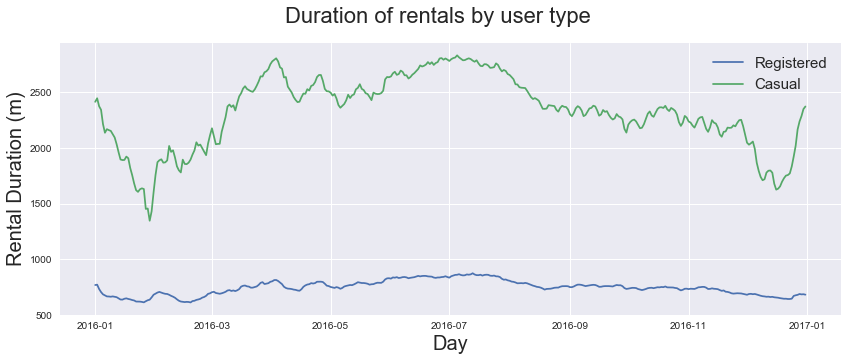

In [10]:
fig, ax = plt.subplots(1)
fig.set_size_inches(14,5)
ax.plot(smoothedReg, label='Registered')
ax.plot(smoothedCas, label='Casual')
ax.set_xlabel('Day',fontsize=20)
ax.set_ylabel('Rental Duration (m)',fontsize=20)
fig.suptitle('Duration of rentals by user type', fontsize=22)
ax.legend(fontsize=15)
#plt.savefig('bike_rolling_type',bbox_inches='tight',dpi=300)

In [12]:
bike2016['startdate'] = bike2016.index
bike2016['startweekday'] = bike2016['startdate'].apply(lambda d: d.weekday())

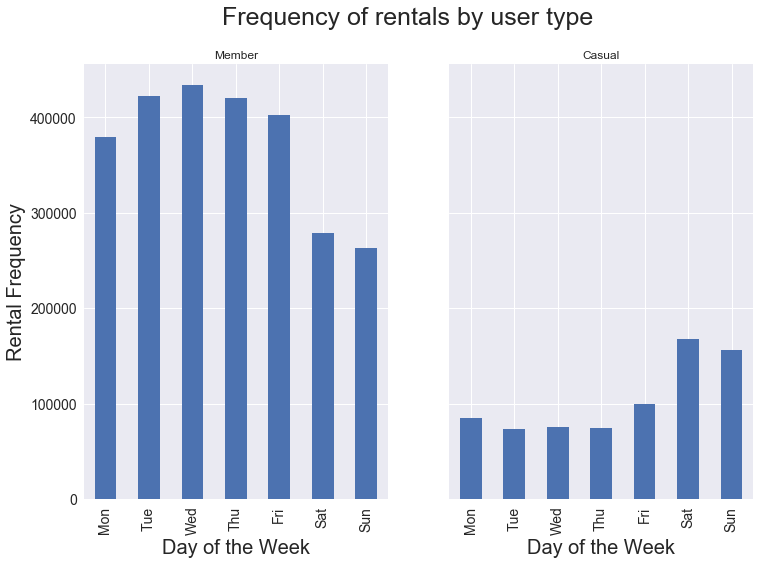

In [13]:
FreqReg=bike2016['startweekday'][bike2016['memtype']=='Member'].value_counts().sort_index()
FreqCas=bike2016['startweekday'][bike2016['memtype']=='Casual'].value_counts().sort_index()
ticks=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] 
fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(12,8)
FreqReg.plot(kind='bar', ax=axes[0],title='Member',fontsize=14)
FreqCas.plot(kind='bar', ax=axes[1],title='Casual',fontsize=14)
axes[0].set_xticklabels(ticks)
axes[1].set_xticklabels(ticks)
fig.suptitle('Frequency of rentals by user type', fontsize=25)
axes[0].set_xlabel('Day of the Week',fontsize=20)
axes[0].set_ylabel('Rental Frequency',fontsize=20)
axes[1].set_xlabel('Day of the Week',fontsize=20)
#plt.savefig('bike_histo_type',bbox='tight',dpi=300)

## Analysis Steps

- Predict demand (# of rentals) on a given day (e.g. for 2017) 
    - linear regression/SVM
    - X: julian day; y: count/day
    - could add X: daily max temp, daily min temp, proximity to metro station
- Predict demand on a given day by station ID
    - linear regression/SVM
    - X: julian day, staion ID; y: count/day/station
    - coul add X: daily max temp, daily min temp, proximity to metro station


#### DC Metro Stations

In [14]:
#find metro station info (euclidian distance... find lat/long of metro stations)
import json
from pandas.io.json import json_normalize

json_data=open('../CapstoneDrafts/data/stations2.json').read()
metro=pd.read_json(json_data, orient='records')
MetroDF = json_normalize(data=metro['Stations'])

print('Number of stations:',len(MetroDF))
MetroDF.head()

Number of stations: 95


Address.City Address.State              Address.Street Address.Zip Code  \
0   Washington            DC             607 13th St. NW       20005  A01   
1   Washington            DC  1001 Connecticut Avenue NW       20036  A02   
2   Washington            DC            1525 20th St. NW       20036  A03   
3   Washington            DC   2700 Connecticut Ave., NW       20008  A04   
4   Washington            DC  3599 Connecticut Avenue NW       20008  A05   

         Lat LineCode1 LineCode2 LineCode3 LineCode4        Lon  \
0  38.898303        RD      None      None      None -77.028099   
1  38.903192        RD      None      None      None -77.039766   
2  38.909499        RD      None      None      None -77.043620   
3  38.924999        RD      None      None      None -77.052648   
4  38.934703        RD      None      None      None -77.058226   

                            Name StationTogether1 StationTogether2  
0                   Metro Center              C01                   
1                 Farragut North                                    
2                  Dupont Circle                                    
3  Woodley Park-Zoo/Adams Morgan                                    
4                 Cleveland Park

This table contains all of the metro station information for DC. I won't include it in the analysis, but will leave it here in case it helps with interpretation later.

#### Weather

In [15]:
# find and add weather data (daily max & min)
weather = pd.read_csv('../CapstoneDrafts/data/dc_weather.csv', parse_dates=True, index_col=2, header=0,
                        names=['station','name','startdate','tmax','tmin'])
weather.head()

station                          name  tmax  tmin
startdate                                                        
2016-01-01  USC00186350  NATIONAL ARBORETUM DC, MD US  56.0  41.0
2016-01-02  USC00186350  NATIONAL ARBORETUM DC, MD US  46.0  31.0
2016-01-03  USC00186350  NATIONAL ARBORETUM DC, MD US  48.0  29.0
2016-01-04  USC00186350  NATIONAL ARBORETUM DC, MD US  53.0  29.0
2016-01-05  USC00186350  NATIONAL ARBORETUM DC, MD US  38.0  15.0

In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7186 entries, 2016-01-01 to NaT
Data columns (total 4 columns):
station    726 non-null object
name       726 non-null object
tmax       726 non-null float64
tmin       724 non-null float64
dtypes: float64(2), object(2)
memory usage: 280.7+ KB


These data are weather for 2016 in DC at the National Arboretum weather station. I gathered this data from NOAA's National Climate Data Center, Climate Data Online request form. Each row contains maximum and minimum temperatures for a day in 2016, in Farenheit.  

In [17]:
weather.describe()

tmax        tmin
count  726.000000  724.000000
mean    69.096419   49.794199
std     17.915251   17.160633
min     24.000000   11.000000
25%     54.000000   35.750000
50%     72.000000   50.000000
75%     84.000000   66.000000
max     99.000000   81.000000

Temperatures in DC (at the National Arboretum) rance from 11-99 F in 2016.  Average high temperature is 69 F and average low temperature is 50 F.

Temperature squared might be a better predictor, so let's also calculate that in the ```weather``` dataframe.

In [18]:
weather['tmax_sq'] = weather['tmax'].apply(lambda t: t**2)
weather['tmin_sq'] = weather['tmin'].apply(lambda t: t**2)

#### Modeling a time component

In [19]:
#add time tracking column (days from 2016-01-01), break dates into month and day
from datetime import datetime as dt
starttime = dt.strptime('2016-01-01', '%Y-%m-%d')
bike2016['timeDelt'] = bike2016['startdate'].apply(lambda d: (d - starttime).days)

In [20]:
bike2016.tail()

duration              enddate  startlocID  \
2016-12-31 23:49:54       614  2017-01-01 00:00:09       31118   
2016-12-31 23:51:58       483  2017-01-01 00:00:01       31612   
2016-12-31 23:52:59       438  2017-01-01 00:00:18       31603   
2016-12-31 23:53:53      1199  2017-01-01 00:13:53       31249   
2016-12-31 23:54:20       824  2017-01-01 00:08:05       31232   

                                                      startloc  endlocID  \
2016-12-31 23:49:54                            3rd & Elm St NW     31102   
2016-12-31 23:51:58                     D St & Maryland Ave NE     31628   
2016-12-31 23:52:59                              1st & M St NE     31506   
2016-12-31 23:53:53                         Jefferson Memorial     31003   
2016-12-31 23:54:20  7th & F St NW / National Portrait Gallery     31290   

                                            endloc  bikeID memtype  \
2016-12-31 23:49:54            11th & Kenyon St NW  W20961  Member   
2016-12-31 23:51:58                  1st & K St SE  W00381  Member   
2016-12-31 23:52:59      1st & Rhode Island Ave NW  W00246  Casual   
2016-12-31 23:53:53              15th & Crystal Dr  W23100  Member   
2016-12-31 23:54:20  17th St & Independence Ave SW  W01135  Member   

                              startdate  startweekday  timeDelt  
2016-12-31 23:49:54 2016-12-31 23:49:54             5       365  
2016-12-31 23:51:58 2016-12-31 23:51:58             5       365  
2016-12-31 23:52:59 2016-12-31 23:52:59             5       365  
2016-12-31 23:53:53 2016-12-31 23:53:53             5       365  
2016-12-31 23:54:20 2016-12-31 23:54:20             5       365

The 'timeDelt' column now ranges from 1 to 365 for all the days in 2016.  This will make it easier to model the progress of time through the year.

In [21]:
bike2016['Year'] = bike2016['startdate'].apply(lambda t: t.year)
bike2016['Month'] = bike2016['startdate'].apply(lambda t: t.month)
bike2016['Day'] = bike2016['startdate'].apply(lambda t: t.day)

In [22]:
bike2016.head()

duration              enddate  startlocID  \
2016-01-01 00:06:58       166  2016-01-01 00:09:44       31102   
2016-01-01 00:10:20       448  2016-01-01 00:17:48       32039   
2016-01-01 00:13:52       715  2016-01-01 00:25:48       31222   
2016-01-01 00:15:29       213  2016-01-01 00:19:03       31506   
2016-01-01 00:16:16       872  2016-01-01 00:30:49       31041   

                                             startloc  endlocID  \
2016-01-01 00:06:58               11th & Kenyon St NW     31105   
2016-01-01 00:10:20  Old Georgetown Rd & Southwick St     32002   
2016-01-01 00:13:52         New York Ave & 15th St NW     31214   
2016-01-01 00:15:29         1st & Rhode Island Ave NW     31509   
2016-01-01 00:16:16              Prince St & Union St     31048   

                                          endloc  bikeID memtype  \
2016-01-01 00:06:58         14th & Harvard St NW  W01346  Member   
2016-01-01 00:10:20  Bethesda Ave & Arlington Rd  W22202  Member   
2016-01-01 00:13:52        17th & Corcoran St NW  W21427  Member   
2016-01-01 00:15:29     New Jersey Ave & R St NW  W01294  Member   
2016-01-01 00:16:16          King St Metro South  W22058  Member   

                              startdate  startweekday  timeDelt  Year  Month  \
2016-01-01 00:06:58 2016-01-01 00:06:58             4         0  2016      1   
2016-01-01 00:10:20 2016-01-01 00:10:20             4         0  2016      1   
2016-01-01 00:13:52 2016-01-01 00:13:52             4         0  2016      1   
2016-01-01 00:15:29 2016-01-01 00:15:29             4         0  2016      1   
2016-01-01 00:16:16 2016-01-01 00:16:16             4         0  2016      1   

                     Day  
2016-01-01 00:06:58    1  
2016-01-01 00:10:20    1  
2016-01-01 00:13:52    1  
2016-01-01 00:15:29    1  
2016-01-01 00:16:16    1

This dataframe also has the number of month, day, and year in separate columns so they are more accessible, just in case they are needed for later steps.

#### Daily totals

The next step is to total all the rental events for each day in 2016.  Let's first see what that might look like with a histogram using the 'timeDelt' column to summarize the data.

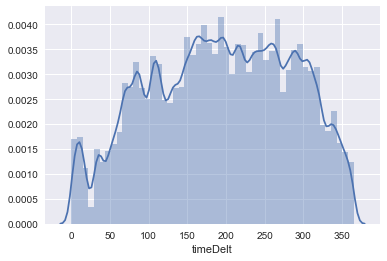

In [23]:
sns.distplot(bike2016['timeDelt'])

It looks like the number of rentals is greatest from about day 75 through 325. This translates to March 15 through November 20.  One might guess this pattern correlates with weather, but let's keep moving.

In [24]:
grouped = bike2016.groupby('timeDelt')['Year','Month','Day','startdate','timeDelt','startweekday'].max()
grouped['totalRents'] = bike2016.groupby('timeDelt')['timeDelt'].size()
grouped['timeDelt_sq'] = grouped['timeDelt'].apply(lambda s: s**2)
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 365
Data columns (total 8 columns):
Year            362 non-null int64
Month           362 non-null int64
Day             362 non-null int64
startdate       362 non-null datetime64[ns]
timeDelt        362 non-null int64
startweekday    362 non-null int64
totalRents      362 non-null int64
timeDelt_sq     362 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 25.5 KB


In [25]:
grouped['startdate'] = grouped['startdate'].apply(lambda s: s.date())

In [26]:
grouped.head()

Year  Month  Day   startdate  timeDelt  startweekday  totalRents  \
timeDelt                                                                     
0         2016      1    1  2016-01-01         0             4        3220   
1         2016      1    2  2016-01-02         1             5        4921   
2         2016      1    3  2016-01-03         2             6        4965   
3         2016      1    4  2016-01-04         3             0        5133   
4         2016      1    5  2016-01-05         4             1        4850   

          timeDelt_sq  
timeDelt               
0                   0  
1                   1  
2                   4  
3                   9  
4                  16

I've also calculated a column as the square of 'timeDelt' which will roughly estimate the cyclical pattern in yearly use patterns. In order to make merging easier later, I've also changed the data type of the 'startdate' column.

#### Holidays

In [27]:
# add holiday indicator
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2016')
grouped = grouped.join(pd.Series(1, index=holidays, name='holiday'))
grouped['holiday'].fillna(0, inplace=True)

#### Combine data into a common dataframe.

In [ ]:
#merge weather data

In [28]:
weather['startdate2'] = weather.index
weather['startdate2'] = weather['startdate2'].apply(lambda s: s.date())
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7186 entries, 2016-01-01 to NaT
Data columns (total 7 columns):
station       726 non-null object
name          726 non-null object
tmax          726 non-null float64
tmin          724 non-null float64
tmax_sq       726 non-null float64
tmin_sq       724 non-null float64
startdate2    726 non-null object
dtypes: float64(4), object(3)
memory usage: 449.1+ KB


In [29]:
totals = pd.merge(grouped, weather, how='left', left_on='startdate', right_on='startdate2')
totals.head()

Year  Month  Day   startdate  timeDelt  startweekday  totalRents  \
0  2016      1    1  2016-01-01         0             4        3220   
1  2016      1    2  2016-01-02         1             5        4921   
2  2016      1    3  2016-01-03         2             6        4965   
3  2016      1    4  2016-01-04         3             0        5133   
4  2016      1    5  2016-01-05         4             1        4850   

   timeDelt_sq  holiday      station                          name  tmax  \
0            0      0.0  USC00186350  NATIONAL ARBORETUM DC, MD US  56.0   
1            1      0.0  USC00186350  NATIONAL ARBORETUM DC, MD US  46.0   
2            4      0.0  USC00186350  NATIONAL ARBORETUM DC, MD US  48.0   
3            9      0.0  USC00186350  NATIONAL ARBORETUM DC, MD US  53.0   
4           16      0.0  USC00186350  NATIONAL ARBORETUM DC, MD US  38.0   

   tmin  tmax_sq  tmin_sq  startdate2  
0  41.0   3136.0   1681.0  2016-01-01  
1  31.0   2116.0    961.0  2016-01-02  
2  29.0   2304.0    841.0  2016-01-03  
3  29.0   2809.0    841.0  2016-01-04  
4  15.0   1444.0    225.0  2016-01-05

In [30]:
totals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 16 columns):
Year            362 non-null int64
Month           362 non-null int64
Day             362 non-null int64
startdate       362 non-null object
timeDelt        362 non-null int64
startweekday    362 non-null int64
totalRents      362 non-null int64
timeDelt_sq     362 non-null int64
holiday         362 non-null float64
station         361 non-null object
name            361 non-null object
tmax            361 non-null float64
tmin            361 non-null float64
tmax_sq         361 non-null float64
tmin_sq         361 non-null float64
startdate2      361 non-null object
dtypes: float64(5), int64(7), object(4)
memory usage: 48.1+ KB


Some days have missing data, so let's forward fill those values.  Especially in the case of temperature data, a forward fill makes sense since one day's weather is more closely related to the day previous than the mean of the whole year.

In [31]:
totals=totals.fillna(method='ffill')

#### Categorical variables
We also need to create dummy variable columns for weekday.

In [32]:
# convert days of the week (startweekday) to dummy variable columns
weekday_dummies = pd.get_dummies(totals['startweekday'], prefix='day')
totals = pd.merge(totals, weekday_dummies, how='outer', left_index=True, right_index=True)

In [33]:
totals.head()

Year  Month  Day   startdate  timeDelt  startweekday  totalRents  \
0  2016      1    1  2016-01-01         0             4        3220   
1  2016      1    2  2016-01-02         1             5        4921   
2  2016      1    3  2016-01-03         2             6        4965   
3  2016      1    4  2016-01-04         3             0        5133   
4  2016      1    5  2016-01-05         4             1        4850   

   timeDelt_sq  holiday      station  ...   tmax_sq  tmin_sq  startdate2  \
0            0      0.0  USC00186350  ...    3136.0   1681.0  2016-01-01   
1            1      0.0  USC00186350  ...    2116.0    961.0  2016-01-02   
2            4      0.0  USC00186350  ...    2304.0    841.0  2016-01-03   
3            9      0.0  USC00186350  ...    2809.0    841.0  2016-01-04   
4           16      0.0  USC00186350  ...    1444.0    225.0  2016-01-05   

   day_0  day_1 day_2  day_3  day_4  day_5  day_6  
0      0      0     0      0      1      0      0  
1      0      0     0      0      0      1      0  
2      0      0     0      0      0      0      1  
3      1      0     0      0      0      0      0  
4      0      1     0      0      0      0      0  

[5 rows x 23 columns]

In [34]:
totals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 23 columns):
Year            362 non-null int64
Month           362 non-null int64
Day             362 non-null int64
startdate       362 non-null object
timeDelt        362 non-null int64
startweekday    362 non-null int64
totalRents      362 non-null int64
timeDelt_sq     362 non-null int64
holiday         362 non-null float64
station         362 non-null object
name            362 non-null object
tmax            362 non-null float64
tmin            362 non-null float64
tmax_sq         362 non-null float64
tmin_sq         362 non-null float64
startdate2      362 non-null object
day_0           362 non-null uint8
day_1           362 non-null uint8
day_2           362 non-null uint8
day_3           362 non-null uint8
day_4           362 non-null uint8
day_5           362 non-null uint8
day_6           362 non-null uint8
dtypes: float64(5), int64(7), object(4), uint8(7)
memory usage: 60.6+ KB


In [35]:
totals.to_csv('../CapstoneDrafts/data/2016totals.csv')

#### Where was the bike rented?
We can also create a totals dataframe maintaining information about the starting bike rental station ('startlocID').

In [36]:
groupedStart = bike2016.groupby(['startlocID','timeDelt'])[
    'Year','Month','Day','startweekday','timeDelt','startlocID'].max()
groupedStart['totalRents'] = bike2016.groupby(['startlocID','timeDelt'])['startlocID'].size()
groupedStart['timeDelt_sq'] = groupedStart['timeDelt'].apply(lambda s: s**2)

Model building continues in 'bikeshare_model' notebook.